Importing the dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading the datasets from keras.datasets

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(type(x_train))
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Display a image

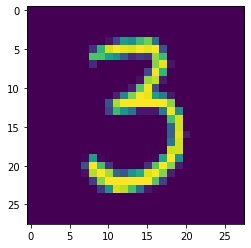

In [ ]:
plt.imshow(x_train[50])
plt.show()

unique value in y_train,y_test

In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Since all the image have same dimension we dont need to reshape it


In [ ]:
#scale the value
x_train=x_train/255
x_test=x_test/255
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building The Neural network

In [ ]:
#setting up the Layer of Neural Network
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(50,activation='relu'),keras.layers.Dense(50,activation='relu'),keras.layers.Dense(10,activation='sigmoid')])

Compiling the neural network

In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training the neural network

In [ ]:
model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0323 - accuracy: 0.9895
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0252 - accuracy: 0.9913
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9922
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9927
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - accuracy: 0.9939
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - accuracy: 0.9941
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - accuracy: 0.9936
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

Model evalaution on test data

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1479 - accuracy: 0.9722


print the first image and check predicted output

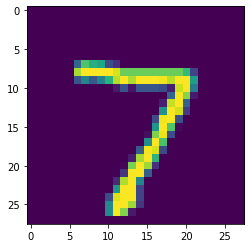

7


In [ ]:
plt.imshow(x_test[0])
plt.show()
print(y_test[0])

In [ ]:
y_pred=model.predict(x_test)
print(y_pred[0])

313/313 [==============================] - 1s 2ms/step
[1.3640564e-04 8.4675997e-01 7.1952038e-02 6.1103857e-01 1.6766812e-07
 5.2898621e-08 3.3681096e-15 9.9999988e-01 5.6014687e-07 9.4476420e-01]


In [ ]:
label_for_firstimage=np.argmax(y_pred[0])
print(label_for_firstimage)

7


Converting the prediction probablities to class label for all test data point.

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
#print(y_pred_labels)

Analyzing using confusion Matrix

Text(0.5, 42.0, 'Predicted label')

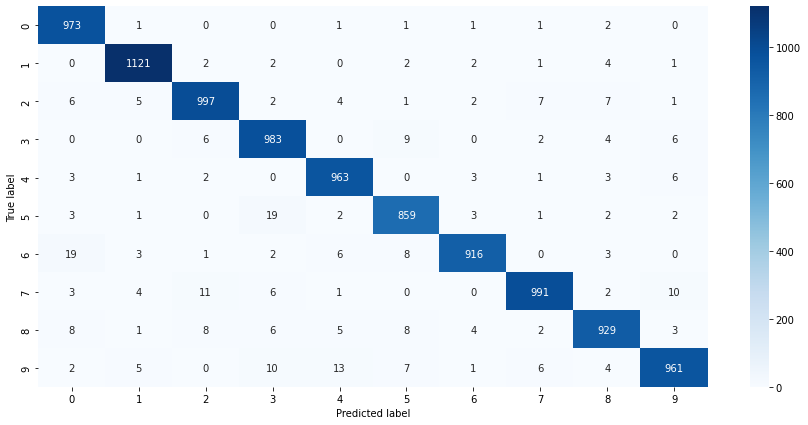

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred_labels)
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Building predictive System

Enter the path of image/RdEpj.png


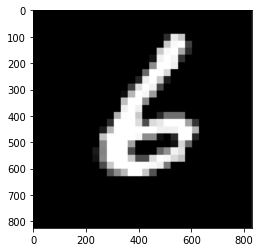

(825, 829, 3)
[[17 11 10 ... 10 18 55]
 [ 9  3  2 ...  2 11 52]
 [ 8  2  1 ...  1 10 51]
 ...
 [ 8  2  1 ...  1 10 51]
 [ 9  3  2 ...  2 11 51]
 [ 9  2  1 ...  1 11 51]]
(28, 28)
1/1 [==============================] - 0s 27ms/step
The digit in the given image is  6


In [ ]:
input_image=input('Enter the path of image')
input_image=cv2.imread(input_image)
type(input_image)
plt.imshow(input_image)
plt.show()
print(input_image.shape)
gray_scale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
print(gray_scale)
input_image_resize=cv2.resize(gray_scale,(28,28))
print(input_image_resize.shape)
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('The digit in the given image is ',input_pred_label)